<a href="https://colab.research.google.com/github/pmj-chosim/Commit-Project-2023.1.20-2023.2.28-/blob/main/2023.02.08/2_Image_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/2023-02-08/2023W_CV_BootCamp/3차시

/content/drive/MyDrive/2023-02-08/2023W_CV_BootCamp/3차시


# 스케일 변경(행렬방식) - #1

(-0.5, 149.5, 189.5, -0.5)

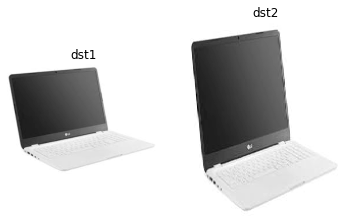

In [3]:
#크기 변경(확대/축소)
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time

image = cv2.imread('images/notebook.png', cv2.IMREAD_GRAYSCALE)

def resize(img, size):  # 크기 변경 함수
  #이미지 사이즈를 역순으로 정리(W,H)->(H,W)                 
  dst = np.zeros(size[::-1], img.dtype)       

  #비율계산, divide나누기 함수, np.divide((150,200),(이미지y,이미지x))
  ratioY, ratioX = np.divide(size[::-1], img.shape[:2]) 

  # 입력 영상 y좌표, x좌표 생성
  y = np.arange(0,img.shape[0],1)
  x = np.arange(0,img.shape[1],1)

  # 격자 그리드 생성 함수
  y, x = np.meshgrid(y,x)

  # 각 x와y에 미리 산정해둔 비율을 곱함                                 
  i,j = np.int32(y * ratioY), np.int32(x * ratioX)# 목적 영상 좌표 

  # 미리 만들어놓은 행렬에 계산된 이미지 변수값 할당
  dst[i,j] = img[y,x]
  return dst

dst1 = resize(image, (150,190))

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image, 'gray')
ax1.set_title('dst1')
ax1.axis('off')                  

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst1, 'gray')
ax2.set_title('dst2')
ax2.axis('off')

# 스케일 변경(반복문 사용) - #2

(-0.5, 149.5, 179.5, -0.5)

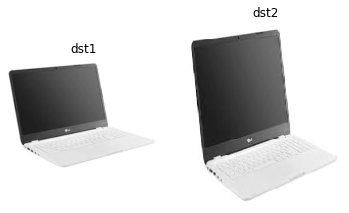

In [4]:
#크기 변경(확대/축소) - 순회방법 사용 
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time

image = cv2.imread('images/notebook.png', cv2.IMREAD_GRAYSCALE)

def resize2(img, size): # 크기 변경 함수 2 - 순회방법 이용
  #이미지 사이즈를 역순으로 정리(W,H)->(H,W) 
  dst = np.zeros(size[::-1], img.dtype)

  #비율계산, divide나누기 함수, np.divide((150,200),(이미지y,이미지x))
  ratioY, ratioX = np.divide(size[::-1], img.shape[:2])
  # 입력영상 순회 이미지의 사이즈 만큼 반복 
  for y in range(img.shape[0]):
    # 입력영상 순회 이미지의 사이즈 만큼 반복                          
    for x in range(img.shape[1]):

      # 목적 영상 좌표값 계산 및 변수할당
      i, j = int(y * ratioY), int(x* ratioX)
      
      # 미리 만들어놓은 행렬에 계산된 이미지 값 할당
      dst[i,j] = img[y,x]
  return dst

dst2 = resize2(image, (150,180))

fig = plt.figure()
rows = 1
cols = 2
                                   
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image, 'gray')
ax1.set_title('dst1')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst2, 'gray')
ax2.set_title('dst2')
ax2.axis('off')

# 스케일 변경(cv2함수사용) - #3

(-0.5, 149.5, 179.5, -0.5)

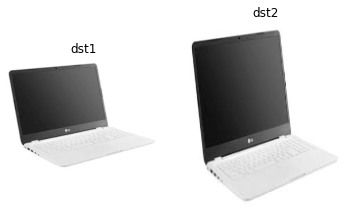

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('images/notebook.png', cv2.IMREAD_GRAYSCALE)

#opencv모듈로부터 리사이즈 함수로 쉽게 구현 가능
dst = cv2.resize(image, (150,180))

fig = plt.figure()
rows = 1
cols = 2
                                   
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image, 'gray')
ax1.set_title('dst1')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst, 'gray')
ax2.set_title('dst2')
ax2.axis('off')

# 크기변경 & 최근접 이웃보간(행렬방식) - #4

(-0.5, 349.5, 399.5, -0.5)

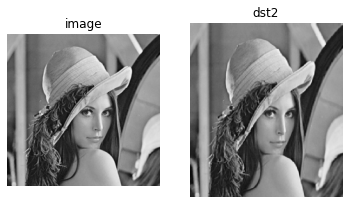

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)

def scaling_nearest(img, size): 
  # 행렬과 크기는 원소가 역순
  dst = np.zeros(size[::-1], img.dtype)
  # 변경 크기 비율값 산정
  ratioY, ratioX = np.divide(size[::-1], img.shape[:2]) 

  # 목적 영상의 세로 좌표 가로좌표 생성
  i = np.arange(0, size[1], 1) 
  j = np.arange(0, size[0], 1) 
  i,j = np.meshgrid(i, j)
  
  # 입력 영상 좌표, 역방향 사상으로 원소값 도출
  y, x = np.int32(i / ratioY), np.int32(j / ratioX)
  # 역방향 사상 -> 입력 영상 좌표 계산
  dst[i,j] = img[y,x]
  return dst
        
# 크기 변경 - 최근접 이웃 보간
dst2 = scaling_nearest(image, (350,400)) 

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image, 'gray')
ax1.set_title('image')                               
ax1.axis('off')

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst2, 'gray')
ax2.set_title('dst2')
ax2.axis('off')


# 크기변경 & 최근접 이웃보간(cv함수 활용) - #5

(-0.5, 699.5, 799.5, -0.5)

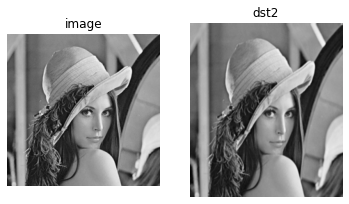

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 인자에 보간 방법 추가하기
image = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)

dst = cv2.resize(image,(700,800), cv2.INTER_LINEAR)

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image, 'gray')
ax1.set_title('image')                               
ax1.axis('off')

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst, 'gray')
ax2.set_title('dst2')
ax2.axis('off')

# 양선형 보간(반복문 사용) - #6

(-0.5, 349.5, 399.5, -0.5)

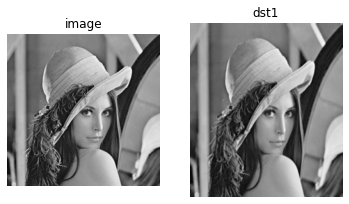

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def bilinear_value(img, pt): # 단일 화소 양선형 보간 수행 함수
  #값 정수형으로 변환 
  x,y = np.int32(pt)
  # 영상 벗어남 처리. 만약 사이즈가 250일때, 250보다 넘어갈때 250으로 맞춰줌
  if x >= img.shape[1]-1: x= x-1 
  if y >= img.shape[0]-1: y= y-1

  # 4개 화소 - 관심영역으로 접근, (y, y+2행 부터, x열 x+2열까지 총 4개의 값을 추출)
  P1, P2, P3, P4 = np.float32(img[y:y+2, x:x+2].flatten()) 

  # 각 입력화소 사이의 비율 계산
  alpha, beta = pt[1] - y, pt[0] - x
  
  #1차보간
  M1 = P1 + alpha * (P3 - P1)        
  M2 = P2 + alpha * (P4 - P2)

  #2차보간
  P = M1 + beta * (M2 - M1)         

  #화소값 밤위 지정 후 반환 
  return np.clip(P, 0, 255)         

def scaling_bilinear(img, size):  # 양선형 보간

  # 변경크기 비율
  ratioY, ratioX = np.divide(size[::-1], img.shape[:2]) 

  #이미지 각 모든 화소의 목적영상으로부터 역사상하여 목적값 추출 및 리스트 저장
  dst = [[ bilinear_value(img, (j/ratioX, i/ratioY))    
  for j in range(size[0])]
  for i in range(size[1])]
  return np.array(dst, img.dtype)

image = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)

size = (350, 400)

#크기변경 - 양선형 보간
dst1 = scaling_bilinear(image, size)                 

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image, 'gray')
ax1.set_title('image')                               
ax1.axis('off')

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst1, 'gray')
ax2.set_title('dst1')
ax2.axis('off')

# 양선형 보간(cv2함수 활용) - #7

(-0.5, 349.5, 399.5, -0.5)

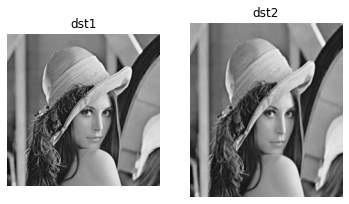

In [9]:
image = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)

size = (350, 400)

# Opencv함수 - 양선형
dst1 = cv2.resize(image, size, 0 , 0 , cv2.INTER_LINEAR)    

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image, 'gray')
ax1.set_title('dst1')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst1, 'gray')
ax2.set_title('dst2')
ax2.axis('off')


# 영상 좌표이동 (반복문 사용) - #8

(-0.5, 219.5, 219.5, -0.5)

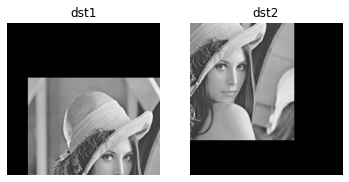

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)

# 좌표 (y,x)가 범위내 인지 검사
def contain(p, shape):  
  # 계산된 이미지크기 p와 원본 이미지크기 shape 내에 존재하는지 확인
  return 0 <= p[0] < shape[0] and 0 <= p[1] < shape[1]

def translate(img,pt):
  # 목적영상 생성
  dst = np.zeros(img.shape, img.dtype)
  for i in range(img.shape[0]):# 목적영상 순회
    for j in range(img.shape[1]):

      #설정해둔 30,80을 각각 x와y에서 감산
      x,y = np.subtract((j,i), pt) 

      # 영상범위 확인
      if contain((y,x), img.shape):
        #계산된값 목적영상에 값 할당
        dst[i,j] = img[y,x]      
  return dst

#30,80 만큼 평행이동
dst1 = translate(image, (30,80))  
#-70, -50 만큼 평행이동
dst2 = translate(image, (-70, -50)) 

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(dst1, 'gray')
ax1.set_title('dst1')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst2, 'gray')
ax2.set_title('dst2')
ax2.axis('off')


# 영상 좌표이동(cv2함수 활용) - #9

(-0.5, 219.5, 219.5, -0.5)

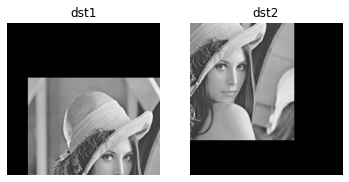

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)

# 이동할 픽셀 거리
dx1, dy1 = 30, 80            
dx2, dy2 = -70, -50          

# 변환 행렬 생성 2X3행렬 생성
mtrx = np.float32([[1, 0, dx1],
                   [0, 1, dy1]]) 

mtrx2 = np.float32([[1, 0, dx2],
                   [0, 1, dy2]]) 

# opencv에서 제공해주는 기하학 이동 함수 (이미지, 매트릭스, 이미지사이즈)
dst1 = cv2.warpAffine(image, mtrx, (image.shape[0],image.shape[1]))
dst2 = cv2.warpAffine(image, mtrx2,(image.shape[0],image.shape[1]))

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(dst1, 'gray')
ax1.set_title('dst1')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst2, 'gray')
ax2.set_title('dst2')
ax2.axis('off')

# 영상 회전(원점 기준) - #10

(-0.5, 219.5, 219.5, -0.5)

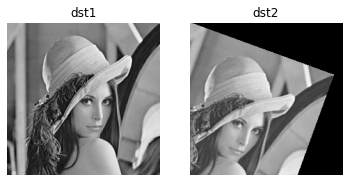

In [13]:
#회전
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

image = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)

def contain(p, shape):  
  # 계산된 이미지크기 p와 원본 이미지크기 shape 내에 존재하는지 확인
  return 0 <= p[0] < shape[0] and 0 <= p[1] < shape[1]
  
def rotate(img, degree):
  # 목적영상 생성
  dst = np.zeros(img.shape[:2], img.dtype)  

  # 회전각도 라디언 값 산출
  radian = (degree/180) * np.pi

  # 넘파이에서 제공해주는 사인과 코사인 함수 사용해서 변수 값 할당      
  sin, cos = np.sin(radian), np.cos(radian)

  # 목적영상 순회
  for i in range(img.shape[0]):            
    for j in range(img.shape[1]):
      #수식 적용
      y = -j * sin + i * cos
      x = j * cos + i * sin
      # 이미지 크기 유지하여 화소값 양선형 보간 수행
      if contain((y,x), img.shape):
        dst[i,j] = bilinear_value(img, [x,y]) # 화소값 양선형 보간
  return dst
dst1 = rotate(image, 20)

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image, 'gray')
ax1.set_title('dst1')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst1, 'gray')
ax2.set_title('dst2')
ax2.axis('off')


# 영상 회전(중심점 기준) - #11

(-0.5, 219.5, 219.5, -0.5)

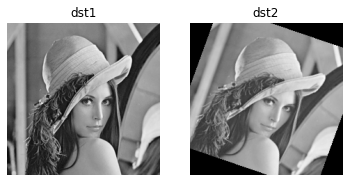

In [14]:
#회전
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

image = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)

def contain(p, shape):  
  # 계산된 이미지크기 p와 원본 이미지크기 shape 내에 존재하는지 확인
  return 0 <= p[0] < shape[0] and 0 <= p[1] < shape[1]

# 중심점 기준 회전 변환 함수
def rotate_pt(img, degree, pt): 
  # 목적 영상 생성
  dst = np.zeros(img.shape[:2], img.dtype)   

  # 회전각도 - 라디언  
  radian = (degree/180) * np.pi         

  # 사인, 코사인 값 계산 및 할당       
  sin, cos = math.sin(radian), math.cos(radian)
  # 목적 영상 순회
  for i in range(img.shape[0]):                
    for j in range(img.shape[1]):

      # 중심좌표 만큼 기준점 이동
      jj,ii = np.subtract((j,i), pt)          

      # 회선 변환 수식 적용
      y = -jj * sin + ii + cos                 
      x = jj * cos + ii * sin
      x, y = np.add((x,y), pt)
      
      # 이미지 크기 유지하여 화소값 양선형 보간 수행
      if contain((y,x), img.shape):            
        dst[i,j] = bilinear_value(img,(x,y))   
  return dst

center = np.divmod(image.shape[::-1], 2)[0]
dst2 = rotate_pt(image, 20, center)

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image, 'gray')
ax1.set_title('dst1')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst2, 'gray')
ax2.set_title('dst2')
ax2.axis('off')

# 영상 회전(cv2 함수 활용) - #12

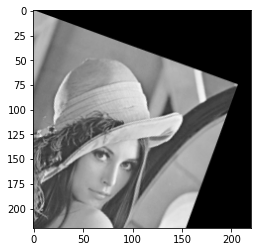

In [15]:
#회전
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

image = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)

# 각도 설정
rad = 20 * math.pi / 180 

# np.array로 Affine 행렬 생성
aff = np.array([[math.cos(rad), -math.sin(rad), 0],
                [math.sin(rad), math.cos(rad), 0]], dtype=np.float32)
               
dst = cv2.warpAffine(image, aff, (0, 0))

plt.imshow(dst,'gray')

# 어파인 변환 함수생성 - #13

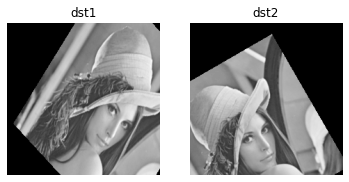

In [16]:
#어파인 변환
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)

def affine_transform(img, mat):
  rows, cols = img.shape[:2]

  #역방향 사상을 위한 역행렬 변환 함수 
  inv_mat = cv2.invertAffineTransform(mat)  
  
  #어파인 행렬과 목적영상행렬을 곱해서 전부 리스트로 정리
  pts = [np.dot(inv_mat, (j,i,1)) for i in range(rows) for j in range(cols)]
  #각 리스트가 목적영상 범위에 벗어나지 않도록 값을확인하고, 보간하여 배열정리
  dst = [bilinear_value(img,p) if contain(p, size) else 0 for p in pts]

  # 1차원배열을 2차원행렬로 변환해줌
  dst = np.reshape(dst, (rows,cols)).astype('uint8') 

  return dst

# 어파인변환시 변환하고자 하는 목적값 변수 할당
value = (200,200)
angle, scale = 30, 1
size = image.shape[::-1]

# 2x3행렬을 만들기위한 변수 할당
pt1 = np.array([(30,70),(20,240), (300,110)], np.float32)
pt2 = np.array([(120,20), (10,180), (280,260)], np.float32)

# 입력영상의 좌표 3개와 바꾸고자 하는 목적영상의 좌표 3개가 들어감
aff_mat = cv2.getAffineTransform(pt1,pt2)

# 회전변환과 크기변경할 수 있는 함수(목적기준점, 회전각도, 변경할크기)
rot_mat = cv2.getRotationMatrix2D(value, angle, scale)

#어파인 변환 함수 활용
dst1 = affine_transform(image, aff_mat)
dst2 = affine_transform(image, rot_mat)

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(dst1, 'gray')
ax1.set_title('dst1')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst2, 'gray')
ax2.set_title('dst2')
ax2.axis('off')


#어파인 opencv함수 활용
dst3 = cv2.warpAffine(image, aff_mat, size, cv2.INTER_LINEAR)
dst4 = cv2.warpAffine(image, rot_mat, size, cv2.INTER_LINEAR)




# 어파인 변환(cv2 함수활용) - #14

(-0.5, 219.5, 219.5, -0.5)

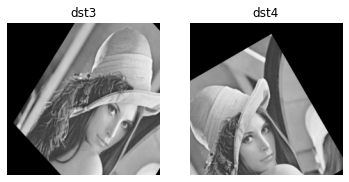

In [17]:
fig = plt.figure()
rows = 1
cols = 2

dst3 = cv2.warpAffine(image, aff_mat, size, cv2.INTER_LINEAR)
dst4 = cv2.warpAffine(image, rot_mat, size, cv2.INTER_LINEAR)

ax3 = fig.add_subplot(rows,cols,1)
ax3.imshow(dst3, 'gray')
ax3.set_title('dst3')
ax3.axis('off')

ax4 = fig.add_subplot(rows,cols,2)
ax4.imshow(dst4, 'gray')
ax4.set_title('dst4')
ax4.axis('off')